# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

#### Открываем CSV файл с данными и выводим первые 3 строки

In [ ]:
# Импортируем библиотеку pandas
import pandas as pd

In [ ]:
# Импортируем библиотеку numpy
import numpy as np

In [ ]:
# Импортируем библиотеку seaborn
import seaborn as sns

In [ ]:
# Импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Читаем CSV файл методом read_csv(), указываем разделитель "\t"
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# Выводим на экран первые 3 строки
print(data.head(3))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             186

**Вывод:** Даже в первых трёх строчках пропущенные значения (NaN) встречаются очень часто. Будем пытаться устранить пропуски, где это возможно.

#### Выводим основную информацию о датафрейме

**Выведем всю основную информацию о датафрейме методом info(): общее кол-во строк и столбцов, названия столбцов, количество записей в столбцах и тип данных.**

In [ ]:
# Используем метод info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** Таблица состоит из 23699 записей и 22 столбцов.<br/>
Колличество записей в столбцах различается. Значит есть пропущенные значения.<br/>
Тип данных в некоторых столбцах не соответствует содержанию столбцов.<br/>
Столбцы:
*last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition* привести к целочисленному типу данных (int).<br/>
*first_day_exposition* привести к типу данных (datetime).<br/>
*is_apartment* привести к булевому типу данных (bool).<br/>
*cityCenters_nearest* имя столбца привести к стилю написания (snake_case).

**Оценим данные в каждом столбце, используя метод describe().**

In [ ]:
# Используем метод describe()
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:** В данных встречаются квартиры с аномально большими площадями *total_area* - 900 м2. С очень большим количеством комнат, для квартиры *rooms* - 19. Квартиры с крайне высокими и низкими потолками *ceiling_height* - 1 м и 100 м. Так же для Петербурга кажется необычным наличие зданий с *floors_total* 60 этажами, кухнями *kitchen_area* по 112 м2 и 5 балконами. Так же, судя по данным, на площадке есть объявления, которые провисели более 4 лет *days_exposition* - 1580.

#### Строим гистограмму для всех числовых столбцов на одном графике

**Строим гистограммы для наглядного представления данных на графиках**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

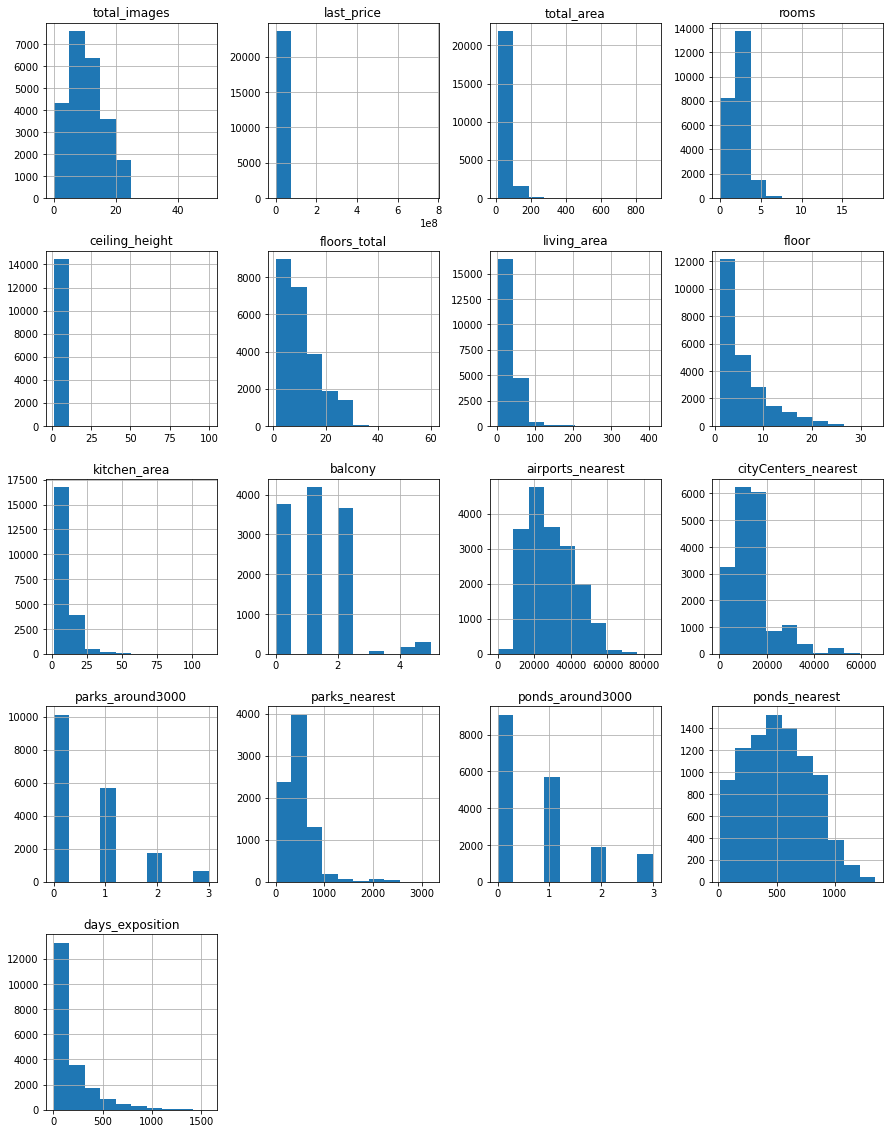

In [ ]:
# Используем метод .hist() для постоения гистограмм. Размер графика 15x20.
data.hist(figsize=(15, 20))

**Вывод:** графики также наглядно подтвердили, что в некоторых столбцах присутствуют аномальные значения.<br/>
*total_area* — на графике видно, что есть квартиры с очень большой площадью (> 800 м2).<br/>
*rooms* — есть квартиры с 0 комнат или даже с 19. <br/>
*ceiling_height* — квартиры с очень высокими потолками (100 м).

### Выполните предобработку данных

#### Находим количество пропущенных значений для каждого столбца

In [ ]:
# Для подсчёта пропусков в столбцах применяем метод .isna(), суммируем .sum()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

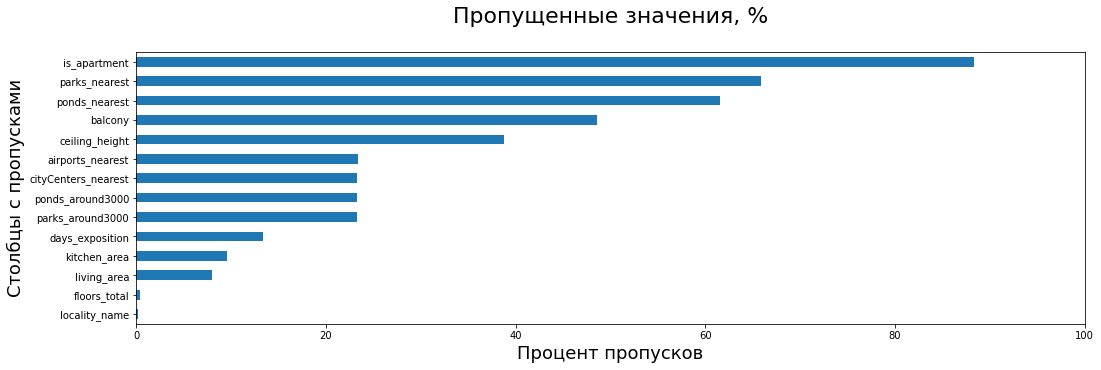

In [ ]:
# Создадим график для наглядного отображения пропусков

def pass_value_barh(data):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (17,5), legend = False)

        );
        plt.title('Пропущенные значения, %' + "\n", fontsize=22)
        plt.xlabel('Процент пропусков', fontsize=18)
        plt.ylabel('Столбцы с пропусками',fontsize=18)
        plt.xlim(0, 100)
        plt.show()
    except:
        print('пропусков нет или произошла ошибка ')

pass_value_barh(data)

**Вывод:** В 14 из 22 столбцов обнаружены пропущенные значения — это довольно много. Будем пробовать заполнять или удалять. В тех случаях, где с ними ничего сделать не получится и их заполнение может привести к некорректным результатам - оставим пропуски не тронутыми.

#### Находим количество явных дубликатов

In [ ]:
# Для подсчёта явных дубликатов применяем метод .duplicated(), суммируем .sum()
data.duplicated().sum()

0

**Вывод:** Явных дубликатов в данных не обнаружено.

#### Заполняем пропущенные значения

Заполняем пропущенные значения в тех столбцах, где это возможно. В тех стобцах, где данных не достаточно, заполняем пропуски нулём или оставляем пропущенное значение.

**floors_total** — Пропуски заполним медианным значением, т.к. данных не достаточно для установления общего количества этажей.

In [ ]:
# Используем метод fillna() для заполнения пропусков
data['floors_total'].fillna(data['floors_total'].median(), inplace=True)

**living_area** — Заполним пропущенные значения в столбце оценочными значениями на основе пропорции между средней жилой и общей площадями. Округлим до двух знаков после запятой.

In [ ]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['living_area'] = data['living_area'].round(2)

**is_apartment** — Возможно некоторые пользователи не указывают этот параметр, т.к. квартира не является апартаментами.<br/> Проставим **False** вместо пропущенных значений.

In [ ]:
# Используем метод fillna() для заполнения
data['is_apartment'] = data['is_apartment'].fillna(False)

**kitchen_area** — Заполним пропущенные значения в столбце оценочными значениями на основе пропорции между средней площадью кухонь и общей площадями. Округлим до двух знаков после запятой.

In [ ]:
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
data['kitchen_area'] = data['kitchen_area'].round(2)

**balcony** — пропуски значений в данном столбце могут указывать на то, что в квартире из объявления балкон отсутствует. Заполним пропущенные значения нулём.

In [ ]:
# Используем метод fillna() для заполнения пропусков
data['balcony'] = data['balcony'].fillna(0)

**locality_name** — пропуски в данном столбце заполнить не представляется возможным. И так как для дальнейшего анализа строки с пропусками в данном столбце не несут пользы и не могут быть использованы — удалим их!

In [ ]:
# Для удаления строк с пропущенными значениями в столбце locality_name используем метод .dropna()
data = data.dropna(subset=['locality_name'])

**ceiling_height** — Пропуски в данном столбце могут свидетельствовать о том, что пользователи сервиса не знают высоту своих потолков или она может варьироваться от комнаты к комнате.<br/>
Заполним пропуски медианными значениями. <br/>
Аномально высокие значения высоты потолков больше 20 м могли возникнуть из за сбоя системы или человеческого фактора. И потолки со значениями типа 27 и 32, в действительности являются 2.7 и 3.2 м. Исправим их. Сместим запятую.

In [ ]:
# Выведем список аномально больших значений высоты потолков.
data['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
17857     27.0
21824     27.0
10773     27.0
5246      27.0
5807      27.0
20478     27.0
22938     27.0
4876      27.0
5669      26.0
11285     25.0
4643      25.0
355       25.0
18545     25.0
9379      25.0
14382     25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
3474       8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [ ]:
# Для значений больше 20 сместим запятую влево. Разделим значения больше 20 на 10.
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10

In [ ]:
# Пропущенные значения заменим на медианные
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [ ]:
# Выбивающиеся значения заменим на медианные вручную.
data.loc[data['ceiling_height'] == 10.00, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 10.30, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 14.00, 'ceiling_height'] = data['ceiling_height'].median()

**airports_nearest** — Для заполнения пропусков не достаточно данных. Округлим до двух знаков.

In [ ]:
data['airports_nearest'] = data['airports_nearest'].round(2)

**cityCenters_nearest** — Для заполнения пропусков данных также не достаточно. Приведём имя столбца к стилю написания snake_case. Округлим до двух знаков.

In [ ]:
# Для переименования используем метод rename().
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data['city_centers_nearest'] = data['city_centers_nearest'].round(2)

**parks_around3000** — Пропущенные значения могут указывать на то, что на расстоянии 3000 м от объекта нет парков. Заполним пропуски нулем.

In [ ]:
# Используем метод fillna() для заполнения пропусков
data['parks_around3000'] = data['parks_around3000'].fillna(0)

**parks_nearest** — Для заполнения пропусков данных не достаточно. Оставим без заполнения. Округлим до двух знаков.

In [ ]:
data['parks_nearest'] = data['parks_nearest'].round(2)

**ponds_around3000** — Пропущенные значения могут указывать на то, что на расстоянии 3000 м от объекта нет прудов. Заполним пропуски нулем.

In [ ]:
# Используем метод fillna() для заполнения пропусков
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**ponds_nearest** — Для заполнения пропусков данных не достаточно. Оставим без заполнения. Округлим до двух знаков.

In [ ]:
data['ponds_nearest'] = data['ponds_nearest'].round(2)

**days_exposition** — Пропуски в данных могли возникнуть из-за того, что объявление всё ещё не снято. Оставим пропуски без изменений.

#### Преобразуем тип данных в столбцах

Изменим тип данных в столбцах согласно их наполнению.

**last_price** — Приведём к целочисленному типу данных, т.к. копеек в данных нет и они нам не нужны.

In [ ]:
# Для изменения типа данных используем метод .astype().
data['last_price'] = data['last_price'].astype(int)

**first_day_exposition** — Тип данных столбца некорректный **object**. Приведём тип данных к **datetime**, оставив только дату, т.к время не указано.

In [ ]:
# Для изменения типа данных используем метод .astype().
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64')

**floors_total** — Приведём столбец к целочисленному типу данных, т.к. количество этажей - целое число.

In [ ]:
# Для изменения типа данных используем метод .astype().
data['floors_total'] = data['floors_total'].astype(int)

**is_apartment** — Изменим тип данных столбца на булев, т.к. наполнение столбца указывает на то, что квартира является или не является аппартаментами.

In [ ]:
# Для изменения типа данных используем метод .astype().
data['is_apartment'] = data['is_apartment'].astype(bool)

**balcony** — Тип данных приведём к целочисленному, т.к. балкон не может указываться дробным числом.

In [ ]:
# Для изменения типа данных используем метод .astype().
data['balcony'] = data['balcony'].astype(int)

**parks_around3000** — Приведём к целочисленному типу данных, т.к. количество парков в радиусе 3000 м должно обозначаться целым числом.

In [ ]:
# Для изменения типа данных используем метод .astype().
data['parks_around3000'] = data['parks_around3000'].astype(int)

**ponds_around3000** — Приведём к целочисленному типу данных, т.к. количество прудов в радиусе 3000 м должно обозначаться целым числом.

In [ ]:
# Для изменения типа данных используем метод .astype().
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

**days_exposition** — Приведём к целочисленному типу данных, т.к. количество дней должно указываться целым числом.

In [ ]:
data['days_exposition'] = np.floor(data['days_exposition']).astype('Int64')

In [ ]:
# Посмотрим на количество оставшихся пропусков.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [ ]:
# Посмотрим на типы данных, которые мы изменили на прошлом шаге.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

**Вывод:**
Возможные причины возникновения пропусков в данных:
- Часть пропущенных значений могло возникнуть из за человеческого фактора, невнимательности заполнявших или намеренно были оставлены без заполнения из-за отсутствия необходимой информации.
- Сервис мог претерпевать обновления, в ходе которых добавлялись новые поля для заполнения.
- Неисправность оборудования или програмные сбои.

#### Исправляем неявные дубликаты

In [ ]:
# Выведем уникальные значения из столбца 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# Дубликаты прослеживаются в названиях с различными вариациями посёлков.
# Исправим найденные неявные дубликаты методом .replace()
data['locality_name'] = (
data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('поселок', 'посёлок')
    .str.replace('городской посёлок', 'посёлок')
    .str.replace('посёлок городского типа', 'посёлок')
    .str.replace('коттеджный посёлок', 'посёлок')
    .str.replace('посёлок при железнодорожной станции', 'посёлок')
    .str.replace('посёлок станции', 'посёлок')
)

In [ ]:
set(data['locality_name'].unique())

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

In [ ]:
len(data['locality_name'].unique())

318

**Вывод:** <br/>
**Возможные причины возникновения пропусков в данных:**

- Пропущенные значения могли возникнуть из-за человеческого фактора, невнимательности при заполнении или намеренного пропуска из-за отсутствия необходимой информации.
- Сервис мог претерпевать обновления, в ходе которых добавлялись новые поля для заполнения.
- Неисправность оборудования или программные сбои.

**В ходе предобработки:**

Были заполнены и исправлены явные и неявные дубликаты.
Значения с большим количеством знаков после запятой были округлены.
Типы данных некоторых столбцов были приведены к нужному типу в соответствии с их значениями.

### Добавьте в таблицу новые столбцы

#### Добавим столбец с ценой одного квадратного метра

In [ ]:
# Для нахождения цены одного квадратного метра поделим стоимость объекта на его
# общую площадь и округлим до двух знаков после запятой.
data['meter_price'] = (data['last_price'] / data['total_area'])
data['meter_price'] = data['meter_price'].round(2)

#### Добавим столбец с днем недели, месяцем и годом публикации объявления

In [ ]:
# Для получения номера дня недели используем метод dt.weekday.
data['day_week_exp'] = data['first_day_exposition'].dt.weekday
# Для получения номера месяца используем метод dt.month.
data['month_exp'] = data['first_day_exposition'].dt.month
# Для получения года используем метод dt.year.
data['year_exp'] = data['first_day_exposition'].dt.year

In [ ]:
data[['first_day_exposition', 'day_week_exp', 'month_exp', 'year_exp']].head()

,first_day_exposition,day_week_exp,month_exp,year_exp
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


#### Добавим столбец типом этажа квартиры

In [ ]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis = 1)

In [ ]:
data[['floor', 'floors_total', 'floor_type']].head(20)

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


#### Добавим столбец с растоянием до центра города в километрах

In [ ]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

### Проведите исследовательский анализ данных

#### Изучим основные параметры объектов недвижимости

**Общая площадь квартир**

In [ ]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'Общая площадь квартир'}, ylabel='Frequency'>

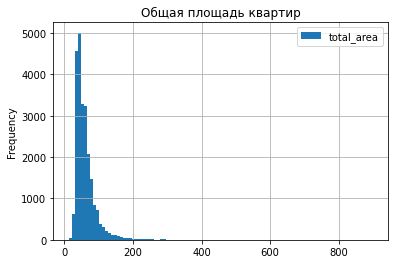

In [ ]:
# Построим гистограмму распределения общей площади квартир.
data.plot(y='total_area', title='Общая площадь квартир', kind='hist', bins=100, grid=True)

<AxesSubplot:title={'center':'Общая площадь квартир без аномальных значений'}, ylabel='Frequency'>

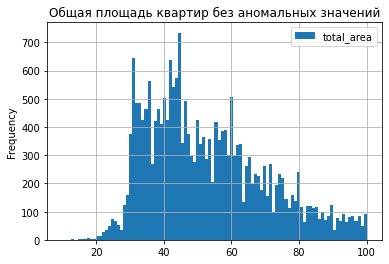

In [ ]:
# Построим гистограмму распределения общей площади квартир с ограничением аномальных значений.
data.plot(y='total_area', title='Общая площадь квартир без аномальных значений', kind='hist', bins=100, grid=True, range=(10, 100))

<AxesSubplot:>

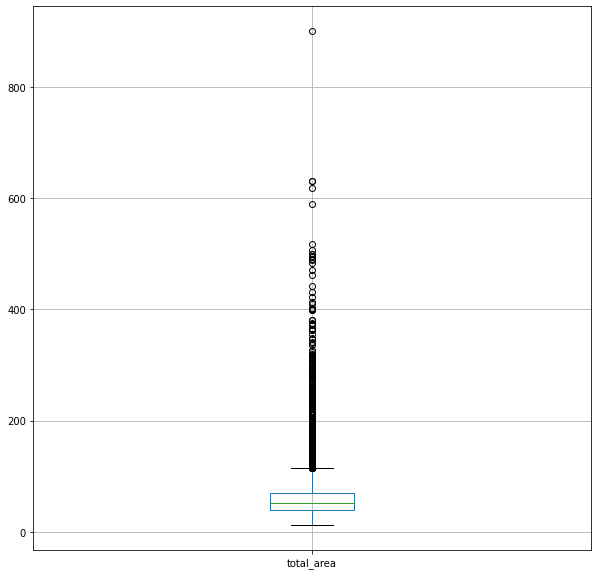

In [ ]:
data.boxplot(column=['total_area'], figsize=(10, 10))

**Вывод:** Анализ представленных графиков показывает, что в данных присутствуют незначительные выбросы до 900 м2. Распределение площади квартир близко к нормальному, с основной массой объявлений, охватывающей квартиры площадью от 30 до 75 м2, и пиком на уровне 45 м2

**Жилая площадь квартир**

In [ ]:
data['living_area'].describe()

count    23650.000000
mean        34.582274
std         22.359589
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'Жилая площадь квартир'}, ylabel='Frequency'>

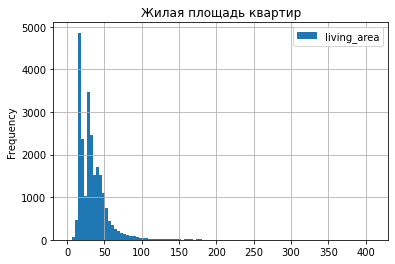

In [ ]:
# Построим гистограмму распределения жилой площади квартир.
data.plot(y='living_area', kind='hist', title='Жилая площадь квартир', bins=100, grid=True)

<AxesSubplot:title={'center':'Жилая площадь квартир без аномальных значений'}, ylabel='Frequency'>

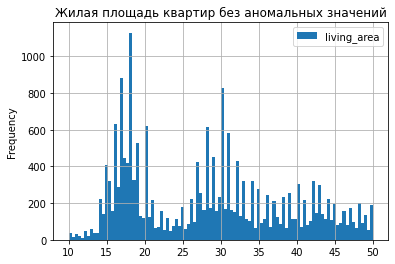

In [ ]:
# Построим гистограмму распределения жилой площади квартир без аномальных значений.
data.plot(y='living_area', kind='hist', title='Жилая площадь квартир без аномальных значений', bins=100, grid=True, range=(10, 50))

<AxesSubplot:>

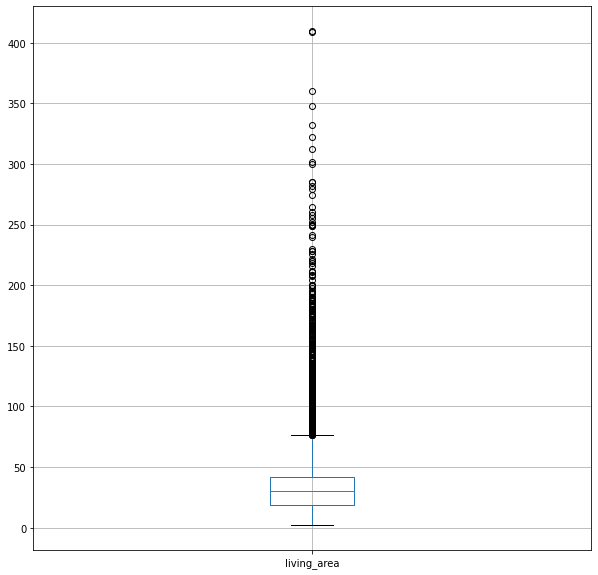

In [ ]:
data.boxplot(column=['living_area'], figsize=(10, 10))

**Вывод:** Распределение жилых площадей не является нормальным. На графике присутствуют два ярковыраженных пика, один около 18 м2, другой около 30 м2.<br/>
Сильный спад наблюдается в районе 25 м2<br/>
Это может быть связано с тем, что пиковые значения жилых площадей характерны для типовых однокомнатных и двухкомнатных квартир.

**Площадь кухни**

In [ ]:
data['kitchen_area'].describe()

count    23650.000000
mean        10.502864
std          6.037448
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Распределение площадей кухни'}, ylabel='Frequency'>

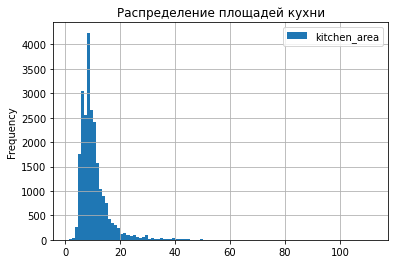

In [ ]:
# Построим гистограмму распределения площадей кухни.
data.plot(y='kitchen_area', kind='hist', title='Распределение площадей кухни', bins=100, grid=True)

<AxesSubplot:title={'center':'Распределение площадей кухни без аномальных значений'}, ylabel='Frequency'>

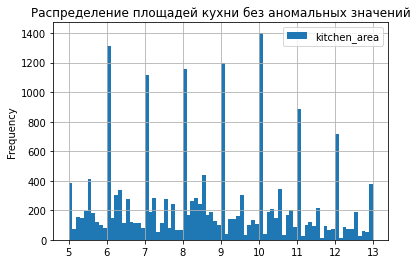

In [ ]:
# Построим гистограмму распределения площадей кухни без аномальных значений.
data.plot(y='kitchen_area', kind='hist', title='Распределение площадей кухни без аномальных значений', bins=80, grid=True, range=(5, 13))

<AxesSubplot:>

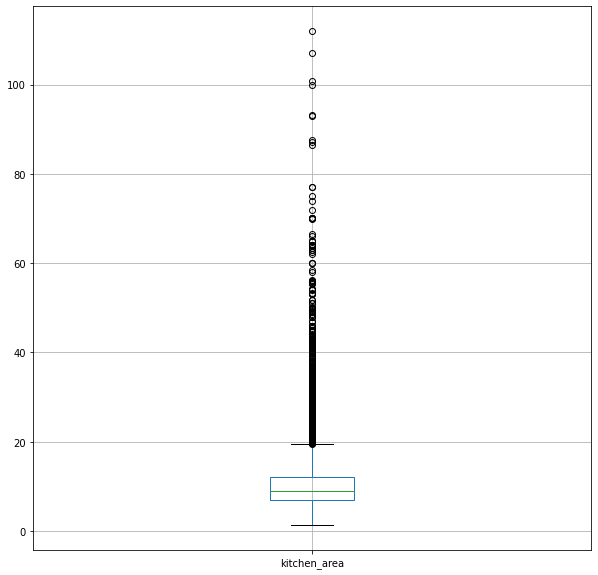

In [ ]:
data.boxplot(column=['kitchen_area'], figsize=(10, 10))

**Вывод:** Согласно представленному распределению, основная масса квартир имеет площадь кухни от 5 до 15 м2, со спадом после этого дипазона. Наиболее часто встречающияся площади кухонь 6, 7, 8, 9 и 10 м2. Эти значения могут быть объяснены типовыми стандартами на оборудование кухонь в квартирах.

**Цена объекта**

In [ ]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Распределение цен объектов'}, ylabel='Frequency'>

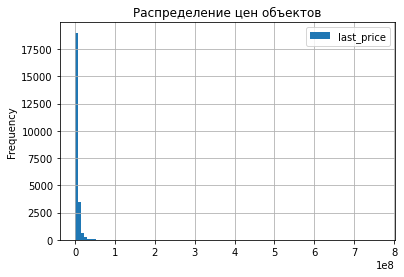

In [ ]:
# Построим гистограмму распределения цены объектов недвижимости.
data.plot(y='last_price', kind='hist', title='Распределение цен объектов', bins=100, grid=True)

<AxesSubplot:title={'center':'Распределение цен объектов без аномальных значений'}, ylabel='Frequency'>

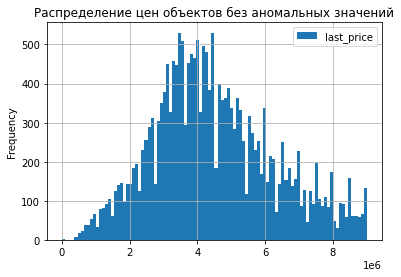

In [ ]:
# Построим гистограмму распределения цены объектов недвижимости без аномальных значений.
data.plot(y='last_price', kind='hist', title='Распределение цен объектов без аномальных значений', bins=100, grid=True, range=(1.219000e+04, 9.00000e+06))

**Вывод:** Согласно представленному графику, большинство объектов имеют цены от 2,5 до 6 миллионов рублей, с наибольшей концентрацией объявлений в диапазоне 3,5 - 4,5 миллионов рублей.

**Количество комнат**

In [ ]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Распределение количества комнат'}, ylabel='Frequency'>

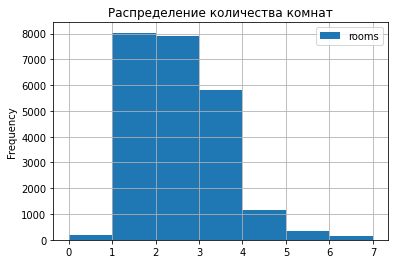

In [ ]:
# Построим гистограмму распределения количества комнат.
data.plot(y='rooms', kind='hist', title='Распределение количества комнат', bins=7, grid=True, range=(0, 7))

<AxesSubplot:>

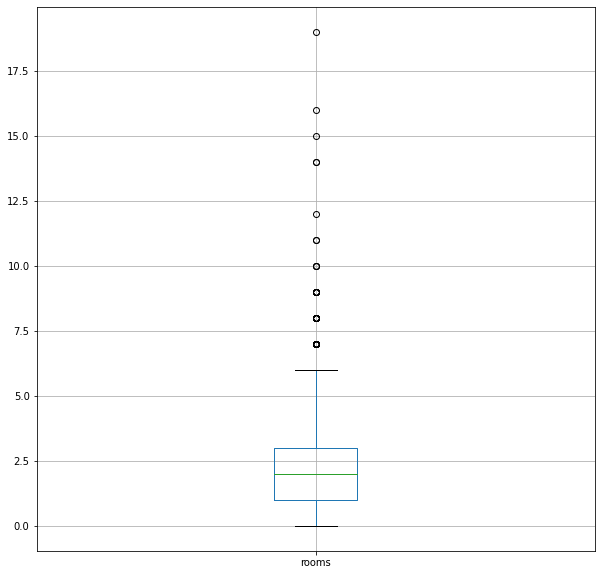

In [ ]:
data.boxplot(column=['rooms'], figsize=(10, 10))

**Вывод:** Большая часть объявлений сосредоточена на квартирах с одной, двумя и тремя комнатами. Далее график резко идет на спад, и объявлений о квартирах с более чем четырьмя комнатами становится крайне мало.

**Высота потолков**

In [ ]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.697506
std          0.232404
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Распределение высот потолков'}, ylabel='Frequency'>

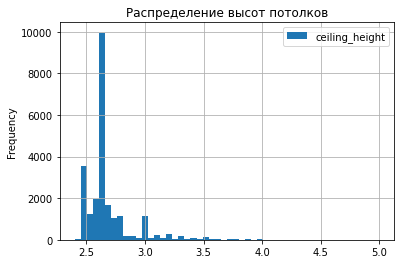

In [ ]:
# Построим гистограмму распределения высот потолков в квартирах.
data.plot(y='ceiling_height', kind='hist', title='Распределение высот потолков', bins=50, grid=True, range=(2.4, 5))

<AxesSubplot:>

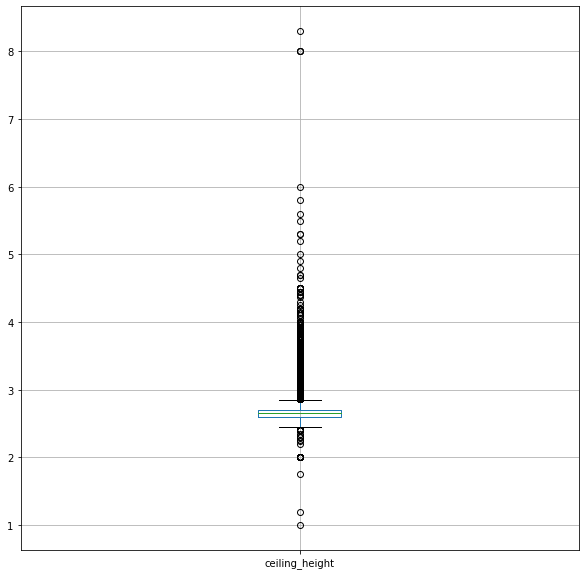

In [ ]:
data.boxplot(column=['ceiling_height'], figsize=(10, 10))

**Вывод:** Как и ожидалось, наибольшая часть объявлений имеют высоту потолков от 2,5 до 3 м. При этом, график после 3 м идёт на спад. Среднее значение высот потолков — 2.6 м.

**Тип этажа квартиры**

<AxesSubplot:title={'center':'Количество квартир в зависимости от типа этажа'}>

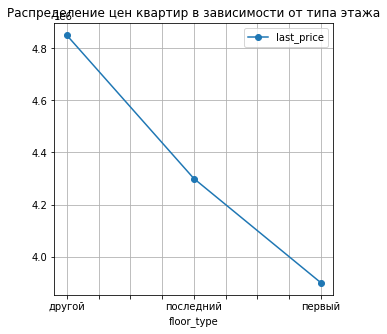

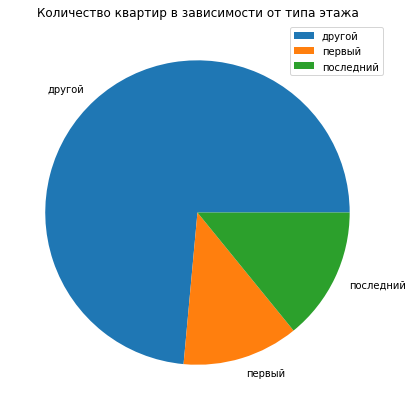

In [ ]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Распределение цен квартир в зависимости от типа этажа')
)

(
    data.pivot_table(index='floor_type',values='last_price',aggfunc='count') \
    .plot.pie(y='last_price', figsize=(10,7), label='', title='Количество квартир в зависимости от типа этажа')
)

**Вывод:** На графиках видно, что объявлений с категориями этажей Первый и Последний примерно четверть от всех объявлений. При этом квартиры с категорией этажа Другой дороже, чем квартиры из других категорий.

**Общее количество этажей в доме**

In [ ]:
data['floors_total'].describe()

count    23650.000000
mean        10.669852
std          6.583725
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'Распределение общего количества этажей'}, ylabel='Frequency'>

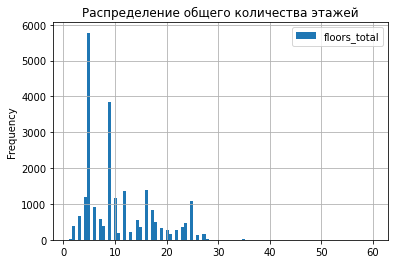

In [ ]:
# Построим гистограмму распределения общего количества этажей в домах.
data.plot(y='floors_total', kind='hist', title='Распределение общего количества этажей', bins=100, grid=True)

<AxesSubplot:title={'center':'Распределение общего количества этажей без выбивающихся значений'}, ylabel='Frequency'>

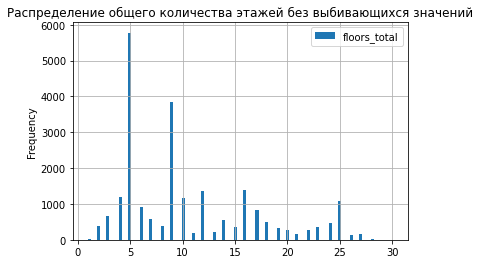

In [ ]:
# Построим гистограмму распределения общего количества этажей в домах без выбивающихся значений.
data.plot(y='floors_total', kind='hist', title='Распределение общего количества этажей без выбивающихся значений', bins=100, grid=True, range=(1, 30))

<AxesSubplot:>

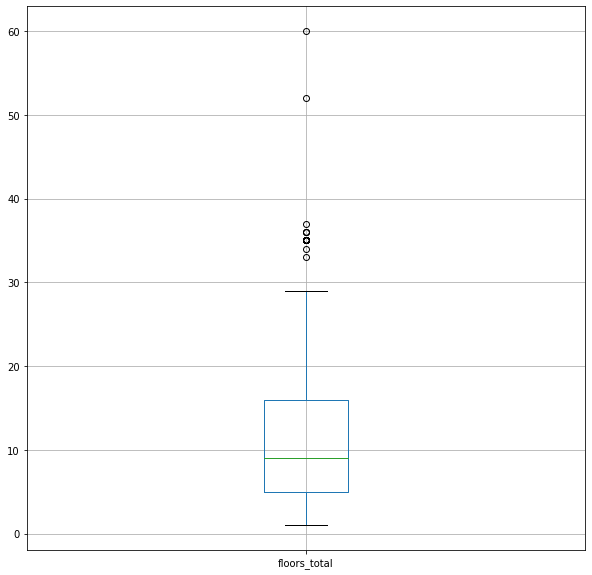

In [ ]:
data.boxplot(column=['floors_total'], figsize=(10, 10))

**Вывод:** Согласно графикам, больше всего предложений о продаже квартир сконцентрированно у 5-ти и 9-ти этажных домов.

**Расстояние до центра города в метрах**

In [ ]:
data['city_centers_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:title={'center':'Растояние до центра города, м'}, ylabel='Frequency'>

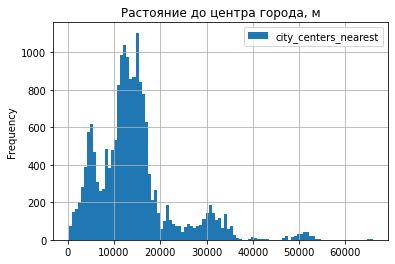

In [ ]:
# Построим гистограмму распределения растояния до центра города в метрах.
data.plot(y='city_centers_nearest', kind='hist', title='Растояние до центра города, м', bins=100, grid=True)

<AxesSubplot:title={'center':'Растояние до центра города без аномальных значений, м'}, ylabel='Frequency'>

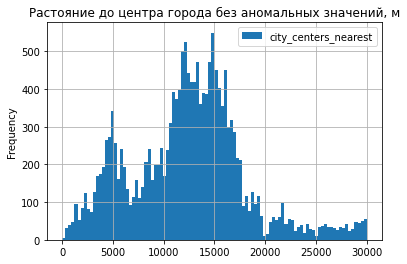

In [ ]:
# Построим гистограмму распределения растояния до центра города в метрах без выбивающихся значений.
data.plot(y='city_centers_nearest', kind='hist', title='Растояние до центра города без аномальных значений, м', bins=100, grid=True, range=(0, 30000))

<AxesSubplot:>

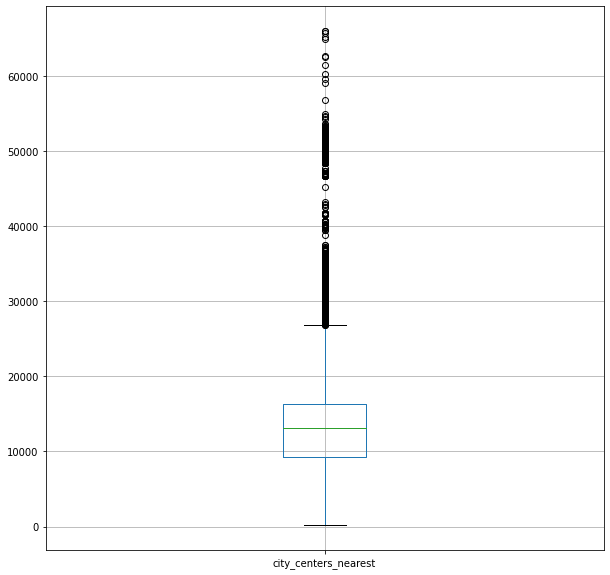

In [ ]:
data.boxplot(column=['city_centers_nearest'], figsize=(10, 10))

Из графика видно, что количество объявлений со значениями растояния до центра больше 25000 м — крайне небольшое. Отсечём эти объявления.

**Вывод:** Больше всего предложений о продаже сконцентрировано у квартир находящихся на расстоянии 5, 12 и 15 км от центра.

**Растояние до ближайшего парка**

In [ ]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'Растояние до ближайшего парка'}, ylabel='Frequency'>

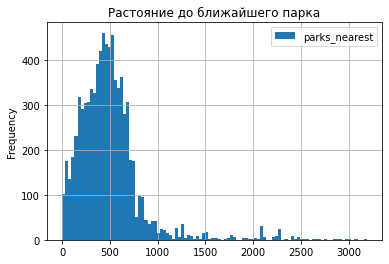

In [ ]:
# Построим гистограмму распределения растояния до центра ближайшего парка.
data.plot(y='parks_nearest', kind='hist', title='Растояние до ближайшего парка', bins=100, grid=True)

<AxesSubplot:title={'center':'Растояние до ближайшего парка'}, ylabel='Frequency'>

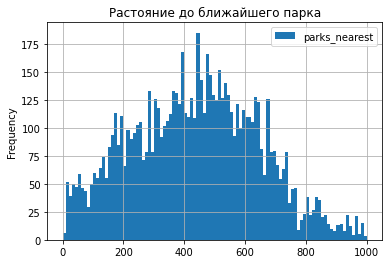

In [ ]:
# Построим гистограмму распределения растояния до центра ближайшего парка без выбивающихся значений.
data.plot(y='parks_nearest', kind='hist', title='Растояние до ближайшего парка', bins=100, grid=True, range=(0, 1000))

<AxesSubplot:>

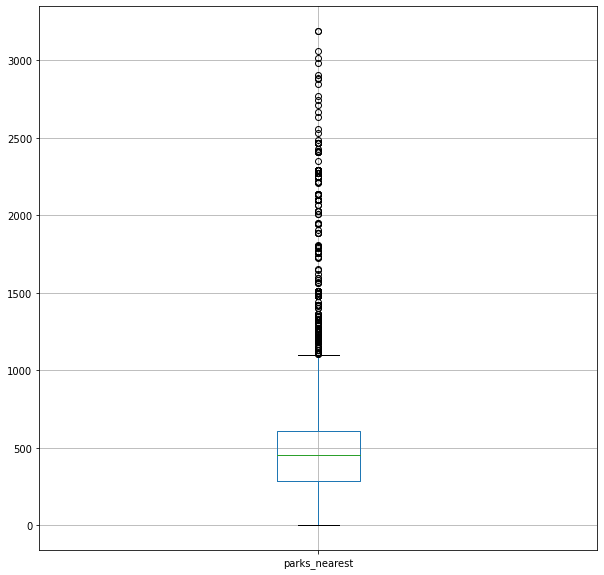

In [ ]:
data.boxplot(column=['parks_nearest'], figsize=(10, 10))

**Вывод:** Большинство квартир в объявлениях находятся на насстоянии 500 м от ближайшего парка.

**ВЫВОД "ОСНОВНЫЕ ПАРАМЕТРЫ ОБЪЕКТОВ НЕДВИЖИМОСТИ":** <br/>
- Основная масса объявлений приходится на квартиры площадью от 30 до 75 м², с пиком на уровне 45 м².
- Жилая площадь варьируется от 10 до 50 м², с двумя ярко выраженными пиками на уровне 20 и 30 м².
- Наиболее часто встречающиеся площади кухонь составляют 6, 7 и 10 м².
- Цена объектов находится в диапазоне 3,5 - 4 миллионов рублей.
- Наибольшее количество объявлений связано с однокомнатными квартирами, затем идет постепенное снижение количества объявлений для двух- и трехкомнатных квартир.
- Средняя высота потолков составляет 2,6 м.
- Самая популярная категория этажей — "Другой", при этом группы "Первый" и "Последний" этажи составляют четверть всех объявлений.
- Больше всего предложений о продаже квартир сконцентрировано в домах с 5 и 9 этажами.
- Максимальное количество предложений приходится на квартиры, расположенные на расстоянии 5, 12 и 15 км от центра города.
- Большинство квартир в объявлениях находятся на расстоянии 500 м от ближайшего парка.

#### Изучим как быстро продавались квартиры

In [ ]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Распределения количества продаж по времени'}, ylabel='Frequency'>

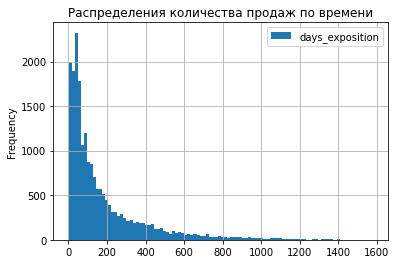

In [ ]:
# Построим гистограмму распределения количества продаж по времени.
data.plot(y='days_exposition', kind='hist', title='Распределения количества продаж по времени', bins=100, grid=True)

<AxesSubplot:title={'center':'Распределения количества продаж по времени без аномальных значений'}, ylabel='Frequency'>

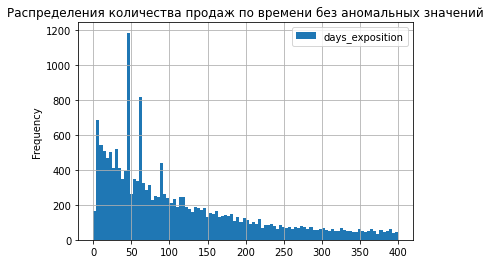

In [ ]:
# Построим гистограмму распределения количества продаж по времени без аномальных значений.
data.plot(y='days_exposition', kind='hist', title='Распределения количества продаж по времени без аномальных значений', bins=100, grid=True, range=(0, 400))

(10.0, 700.0)

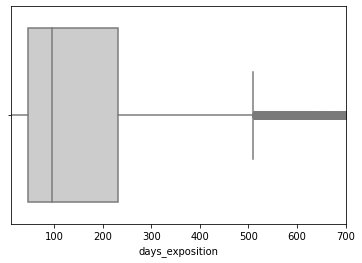

In [ ]:
sns.boxplot(x=data['days_exposition'], color='.8')
plt.xlim(10, 700)

**Вывод:** Медианное время продажи квартиры составляет 95 дней, а среднее — 180 дней. В большинстве случаев продажа квартиры занимает не более 3 месяцев. Быстрой считается продажа, совершенная в течение 45 дней, а необычно долгой — после 230 дней.

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

Изучим, зависит ли цена ('last_price') от:

- общей площади ('total_area');
- жилой площади ('living_area');
- площади кухни ('kitchen_area');
- количества комнат ('rooms');
- этажа, на котором расположена квартира (первый, последний, другой) ('floor_type');
- даты размещения (день недели, месяц, год) ('day_week_exp', ''month_exp', 'year_exp')

In [ ]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dataq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dataq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height' ]
for col in list_features:
    data[col] = quartile_range(data, col)

**Зависимость цены от общей площади**

0.6939002485197524

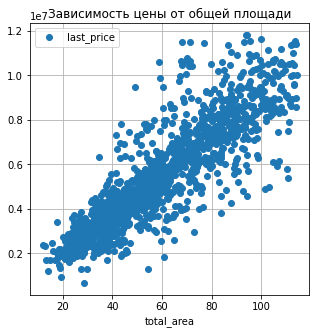

In [ ]:
(
    data.pivot_table(index='total_area', values='last_price')
        .plot(grid=True, style='o', title='Зависимость цены от общей площади', figsize=(5, 5))
)
# Посчитаем коэффициент корреляции Пирсона между ценой и общей площадью
data['last_price'].corr(data['total_area'])

**Зависимость цены от жилой площади**

0.5737500599124782

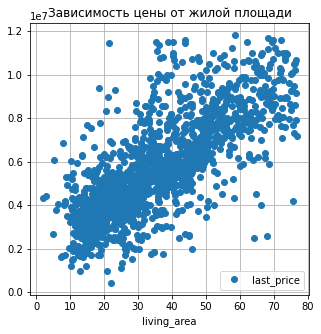

In [ ]:
(
    data.pivot_table(index='living_area', values='last_price')
        .plot(grid=True, style='o', title='Зависимость цены от жилой площади', figsize=(5, 5))
)
# Посчитаем коэффициент корреляции Пирсона между ценой и жилой площадью
data['last_price'].corr(data['living_area'])

**Зависимость цены от площади кухни**

0.5096559629657003

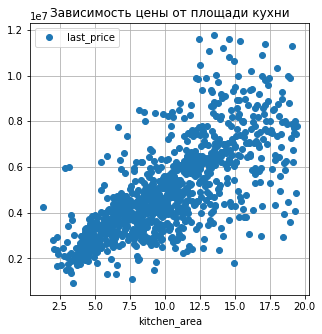

In [ ]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
        .plot(grid=True, style='o', title='Зависимость цены от площади кухни', figsize=(5, 5))
)
# Посчитаем коэффициент корреляции Пирсона между ценой и площадью кухни.
data['last_price'].corr(data['kitchen_area'])

**Зависимость цены от числа комнат**

<AxesSubplot:title={'center':'Зависимость цены от числа комнат'}, xlabel='rooms'>

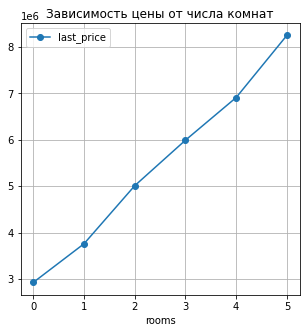

In [ ]:
(
    data.pivot_table(index='rooms', values='last_price')
        .plot(grid=True, style='o-', title='Зависимость цены от числа комнат', figsize=(5, 5))
)

**Зависимость цены от типа этажа**

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='floor_type'>

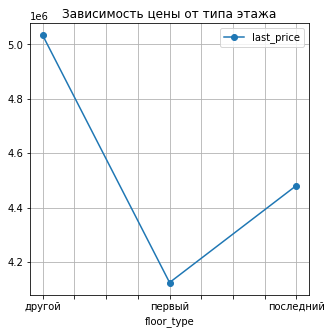

In [ ]:
(
    data.pivot_table(index='floor_type', values='last_price')
        .plot(grid=True, style='o-', title='Зависимость цены от типа этажа', figsize=(5, 5))
)

**Зависимость цены от даты размещения**

<AxesSubplot:title={'center':'Зависимость цены от года размещения'}, xlabel='year_exp'>

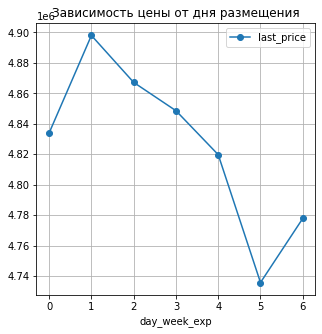

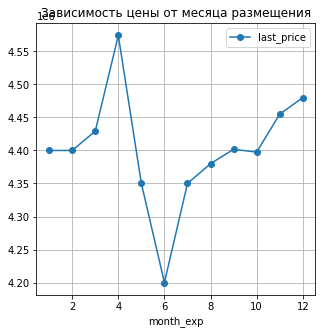

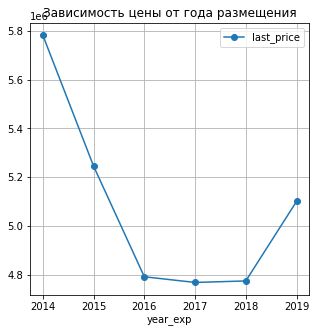

In [ ]:
(
    data.pivot_table(index='day_week_exp', values='last_price')
        .plot(grid=True, style='o-', title='Зависимость цены от дня размещения', figsize=(5, 5))
)

(
    data.pivot_table(index='month_exp', values='last_price', aggfunc='median')
        .plot(grid=True, style='o-', title='Зависимость цены от месяца размещения', figsize=(5, 5))
)

(
    data.pivot_table(index='year_exp', values='last_price')
        .plot(grid=True, style='o-', title='Зависимость цены от года размещения', figsize=(5, 5))
)

**Вывод:**
- Чем больше общая площадь, жилая площадь, площадь кужни, тем выше цена. Корреляция параметров высокая.
- Количество комнат так же сильно влияет на цену, т.к. при этом увеличивается и площадь квартиры. Больше комнат, больше цена.
- Наибольшая стоимость у квартир с категорией этажа "Другой", немного дешевле с категорией "Последний". "Первый" - самый дешевый.
- Дешевле всего квартиры проданные в субботу, дороже всего во вторник.
- Самые дорогие квартиры пришлись на апрель. Самые дешевые на июнь.
- Сильный спад цен на квартирф наблюдался в 2015 году, затем рост произошел только в 2018-2019 годах.


#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
location_sm_price = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
location_sm_price.columns = ['count']
location_sm_price = location_sm_price.sort_values(by='count', ascending=False).head(10)
location_sm_price['meter_price'] = data.pivot_table(index='locality_name', values='meter_price').round(2)
location_sm_price.sort_values(by='meter_price', ascending=False)

,count,meter_price
locality_name,,
Санкт-Петербург,13737,114849.01
Пушкин,338,103125.82
деревня Кудрово,298,92473.55
посёлок Парголово,327,90175.91
посёлок Мурино,556,85681.76
посёлок Шушары,440,78677.36
Колпино,336,75424.58
Гатчина,305,68746.15
Всеволожск,397,68654.47


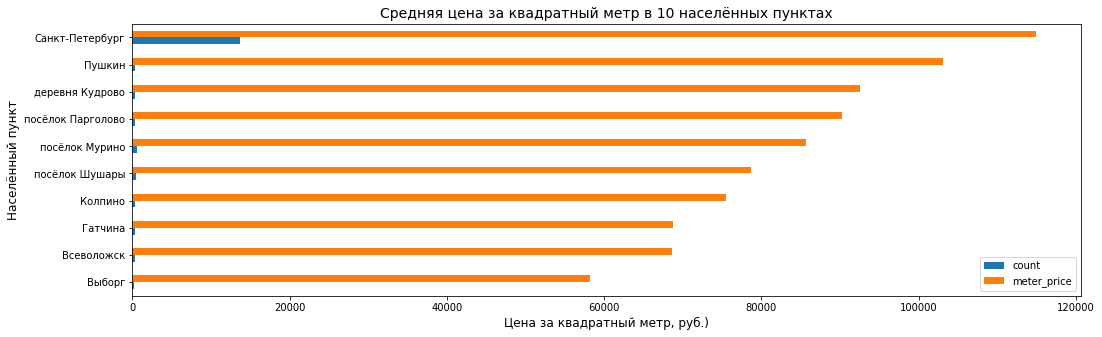

In [ ]:
location_sm_price.sort_values('meter_price', ascending=True).plot(kind = 'barh', figsize = (17,5), legend = True)
plt.xlabel('Цена за квадратный метр, руб.)', fontsize=12)
plt.ylabel('Населённый пункт', fontsize=12)
plt.title('Средняя цена за квадратный метр в 10 населённых пунктах', fontsize=14)
plt.show()

**Вывод:** Самая большая средняя стоимость одного квадратного метра наблюдается в самом Санкт-Петербурге - 114849.01. Недалеко от Питера ушел и соседний Пушкин - 103125.82. Далее по списку расположились ближайшие деревни и посёлки близ Питера. Наименьшая стоимость квадратного метра из топ 10 населённых пунктов зафиксирована у Выборга - 58141.91, что практически в половину меньше, чем у столицы области.

#### Вычислим среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра

In [ ]:
data.query('locality_name == "Санкт-Петербург"')['city_centers_nearest_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

<AxesSubplot:xlabel='city_centers_nearest_km'>

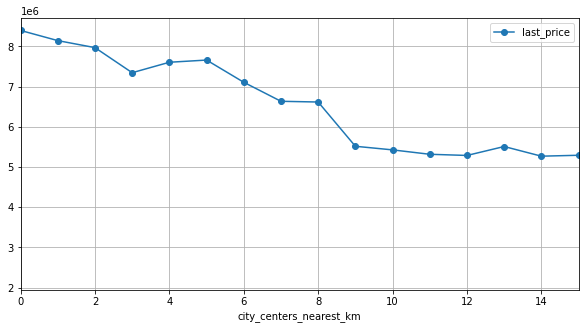

In [ ]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)

In [ ]:
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km < 10').pivot_table(values='last_price', index='city_centers_nearest_km')

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
city_centers_nearest_km,
0.0,8.398000e+06
1.0,8.145277e+06
2.0,7.970519e+06
3.0,7.346575e+06
4.0,7.606618e+06
5.0,7.661225e+06
6.0,7.108234e+06
7.0,6.635321e+06
8.0,6.617244e+06


**Вывод:** Ожидаемо, самая высокая стоимость квартир в Санкт-Петербурге приходится на первые 6 километров от центра города и находится в диапазоне от 7.1 млн до 8.4 млн рублей.

### Общий вывод

В ходе проведения исследовательского анализа объявлений о продаже квартир, предоставленных сервисом Яндекс Недвижимость, были проведены следующие этапы:
1. Открыли предоставленный файл с данными и получили основную информацию о его структуре и наполнении.
- Датафрейм состоит из 23699 записей и 22 столбцов.
- В 14 из 22 столбцов присутствуют пропущенные значения.
- Во многих столбцах, так же, есть аномальные значения, выбивающиеся из основного ряда.
2. Провели предобработку полученных данных.
- Заполнили явные пропуски.
- Привели столбцы к типу данных, согласно наполнению столбцов.
- Округлили значения площадей и растояний.
- Предположили причину возникновения пропущенных значений в данных.
3. Добавили дополнительные столбцы в таблицу:
- *meter_price* - столбец с ценой одного квадратного метра
- *day_week_exp* - столбец с указанием дня публикации объявления
- *month_exp* - столбец с указанием месяца публикации объявления
- *yearh_exp* - столбец с указанием года публикации объявления
- *floor_type* - столбец с указанием типа этажа квартиры в объявлении
- *city_centers_nearest_km* - столбец с указанием расстояния до центра города в километрах
4. Провели исследовательский анализ данных
- Изучили основные параметры объектов недвижимости и построили гистограммы для каждого из параметров.
 - В совокупности среднестатистическое предложение на рынке недвижимости выглядит так: Квартира общей площадью 45 м2 с жилой площадью порядка 18 м2 и кухней 10 м2. В пяти или девяти этажном доме с высотой потолков 2.6 м. Одна или двух комнатная не на первом и последнем этаже. Расстояние до центра населённого пункта не более 15 км и ближайшего парка в среднем 500 м.
- Выяснили как быстро продавались квартиры.
 - Медианное время составило 95 дней, а среднее 180.
 - Продажа объектов осуществляется за 3 месяца.
 - Быстрые продажи предпологают заключение сделки за 45 дней, а долгими считаются те, которык продались больше чем за 7.5 месяцев.
- Определили факторы, которые больше всего влияют на общую (полную) стоимость объекта.
 - С ростом общей площади, соответственно растет и цена объектов.
 - С увеличением количества комнат цена также увеличивается.
 - Квартиры находящиеся на первом этаже значительно дешевле квартир на последнем и других этажах.
- Посчитана цена одного квадратного метра площади в 10 населённых пунктах с наибольшим числом объявлений.
 - Самая большая средняя стоимость одного квадратного метра наблюдается в самом Санкт-Петербурге - 114849.01. Недалеко от Питера ушел и соседний Пушкин - 103125.82. Далее по списку расположились ближайшие деревни и посёлки близ Питера. Наименьшая стоимость квадратного метра из топ 10 населённых пунктов зафиксирована у Выборга - 58141.91, что практически в половину меньше, чем у столицы области.
- Вычислена средняя стоимость на разном удалении от центра.
 - Самая большая средняя стоимость наблюдается в самом городе Санкт-Петербург, далее по списку следуют населённые пункты на расстоянии порядка 6 км от центра. Цены на эти объекты находятся в диапазоне от 7.1 млн до 8.4 млн рублей.